### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
#data = pd.read_csv('data/coupons.csv')
data = pd.read_csv('/content/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

<Axes: title={'center': 'NaN Distribution per Column'}, xlabel='Column Name', ylabel='Count'>

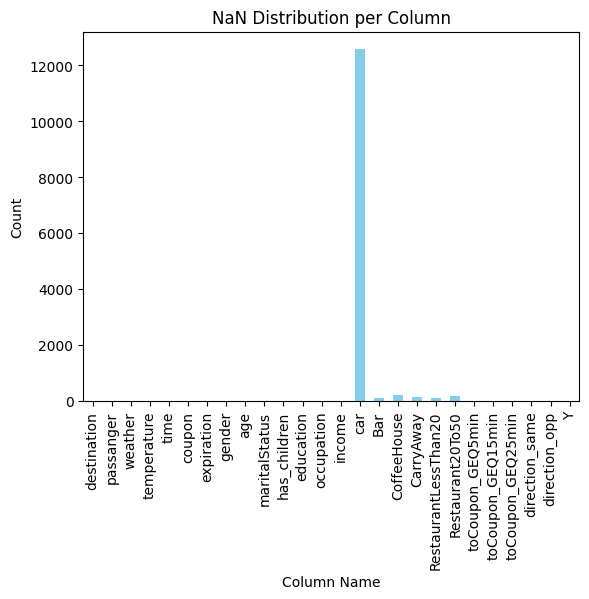

In [4]:
# Data cleanning:
# Understanding the distributions of the NaN value. It is known that 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' columns have NaN values
nan_counts = data.isna().sum()
plt.title('NaN Distribution per Column')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.xticks(rotation=45)
nan_counts.plot(kind='bar', color='skyblue')
plt.savefig('nan_counts_distribution.png')

In [5]:
# Cleanning NaN value in 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' columns
# drop car column because 99% of rows in this column is meanningless
nanCountOnCar = data['car'].isnull().sum()
totalRows = data.shape[0]
nanRatioOnCar = (nanCountOnCar/totalRows) * 100
nanRatioOnCar
dataDropCar = data.drop('car', axis=1)

# drop rows that contain NaN in either 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' columns because the amount of NaN is pretty small
# drop these rows should not impact the analysis results.
dataCleaned = dataDropCar.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
nan_counts_in_cleaned_data = dataCleaned.isna().sum()
nan_counts_in_cleaned_data


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# The proportion of the total observations chose to accept the coupon is about 0.57
proportionOfAcceptCoupon = dataCleaned[dataCleaned['Y'] == 1].shape[0] / dataCleaned.shape[0]
proportionOfAcceptCoupon

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

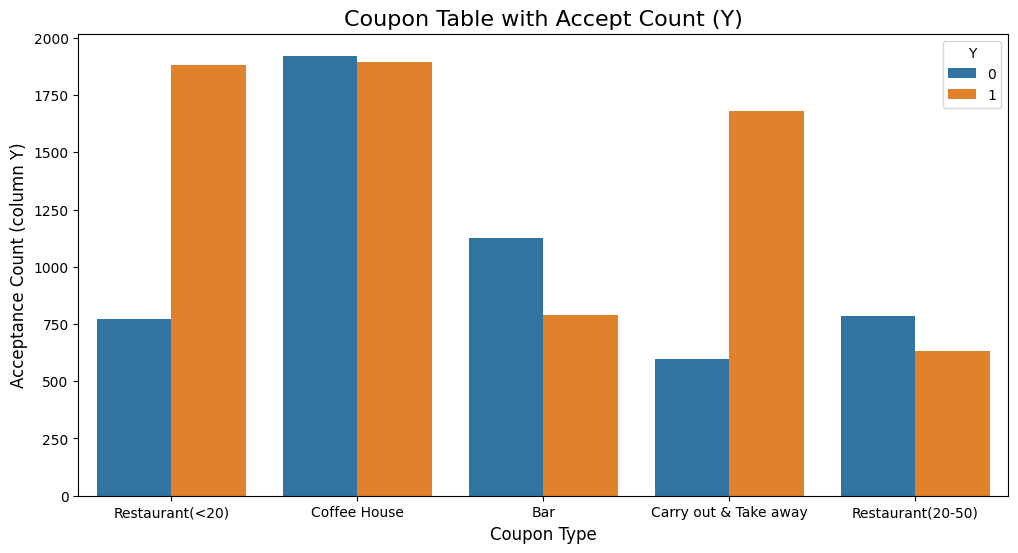

In [128]:
# Visualize the coupon column
plt.figure(figsize=(12, 6))
sns.countplot(data=dataCleaned, x='coupon', hue='Y')
plt.title('Coupon Table with Accept Count (Y)', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Acceptance Count (column Y)', fontsize=12)
plt.savefig('coupon_table_with_accept_count.png')

6. Use a histogram to visualize the temperature column.

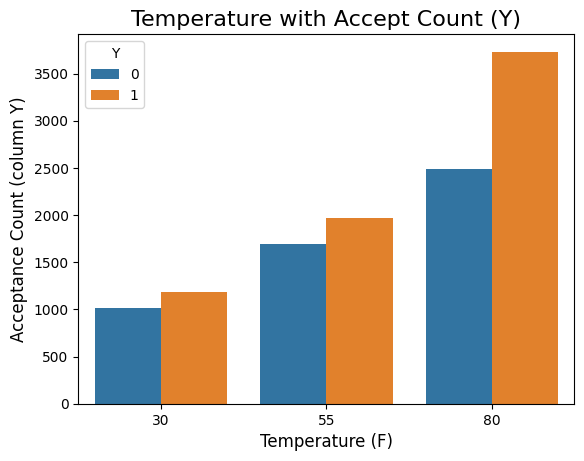

In [129]:
# Visulaize temperature column
sns.countplot(data=dataCleaned, x='temperature', hue='Y')
plt.title('Temperature with Accept Count (Y)', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Acceptance Count (column Y)', fontsize=12)
plt.savefig('temperature_with_accept_count.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# Create data frame just contains bar coupons
barData = dataCleaned[dataCleaned['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [10]:
# Total acceptance rate of Bar Coupon
barProportionOfAcceptCoupon = barData[barData['Y'] == 1].shape[0] / barData.shape[0]
barProportionOfAcceptCoupon

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [100]:
# acceptance rate of those who went to a bar 3 or fewer times a month:
barCountForLowFreqVisit = barData[barData['Bar'].isin(['never', 'less1', '1~3'])]
barAcceptRateForLowFrequentVisit = barCountForLowFreqVisit[barCountForLowFreqVisit['Y'] == 1].shape[0] / barCountForLowFreqVisit.shape[0]
barAcceptRateForLowFrequentVisit

# acceptance rate of those who went to a bar more than 3 times a month:
barCountForHighFreqVisit = barData[barData['Bar'].isin(['4~8', 'gt8'])]
barAcceptRateForHighFrequentVisit = barCountForHighFreqVisit[barCountForHighFreqVisit['Y'] == 1].shape[0] / barCountForHighFreqVisit.shape[0]
barAcceptRateForHighFrequentVisit

barAcceptRateForLowFrequentVisit, barAcceptRateForHighFrequentVisit

(0.37267441860465117, 0.7616580310880829)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [107]:
# acceptance rate of those who went to a bar more than once a month and over 25 years old:
moreThanOnce = ['1~3', '4~8', 'gt8']
over25 = ['26', '31', '50plus', '36', '41', '46']
barCountForMoreThanOnceOver25 = barData.query('Bar in @moreThanOnce & age in @over25')
barAcceptRateForMoreThanOnceOver25 = barCountForMoreThanOnceOver25[barCountForMoreThanOnceOver25['Y'] == 1].shape[0] / barCountForMoreThanOnceOver25.shape[0]
barAcceptRateForMoreThanOnceOver25

# acceptance rate of those who went to a bar less than once a month and other ages:
barCountForMoreThanOnceOtherAges = barData.query('Bar not in @moreThanOnce & age not in @over25')
barAcceptRateForLessThanOnceOtherAges = barCountForMoreThanOnceOtherAges[barCountForMoreThanOnceOtherAges['Y'] == 1].shape[0] / barCountForMoreThanOnceOtherAges.shape[0]
barAcceptRateForLessThanOnceOtherAges

barAcceptRateForMoreThanOnceOver25, barAcceptRateForLessThanOnceOtherAges

(0.6898263027295285, 0.3883495145631068)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [15]:
# acceptance rate of those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fisihing or forestry
moreThanOnce = ['1~3', '4~8', 'gt8']
passanger_kids = ['Kid(s)']
occupation_3F = ['Farming Fishing /& Forestry']
barCountForMoreThanOnce_NoKids_3FOccup = barData.query('Bar in @moreThanOnce & passanger not in @passanger_kids & occupation not in @occupation_3F')
barAcceptRateForMoreThanOnce_NoKids_3FOccup = barCountForMoreThanOnce_NoKids_3FOccup[barCountForMoreThanOnce_NoKids_3FOccup['Y'] == 1].shape[0] / barCountForMoreThanOnce_NoKids_3FOccup.shape[0]
barAcceptRateForMoreThanOnce_NoKids_3FOccup



0.7094339622641509

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [16]:
#Compare the acceptance rates between those drivers who:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
#go to bars more than once a month and are under the age of 30 OR
#go to cheap restaurants more than 4 times a month and income is less than 50K.

moreThanOnce = ['1~3', '4~8', 'gt8']
passanger_kids = ['Kid(s)']
maritalStatus_windowed = ['Windowed']
age_under30 = ['21', '26', 'below21']
income_under50K = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
restaurantLessThan20_moreThan4Times = ['4~8', 'gt8']

# go to bars more than once a month, had passengers that were not a kid, and were not widowed
count_moreThanOnce_noKid_noWindowed = barData.query('Bar in @moreThanOnce & passanger not in @passanger_kids & occupation not in @maritalStatus_windowed')
accptRate_moreThanOnce_noKid_noWindowed = count_moreThanOnce_noKid_noWindowed[count_moreThanOnce_noKid_noWindowed['Y'] == 1].shape[0] / count_moreThanOnce_noKid_noWindowed.shape[0]

# go to bars more than once a month and are under the age of 30
count_moreThanOnce_under30 = barData.query('Bar in @moreThanOnce & age in @age_under30')
acceptRate_moreThanOnce_under30 = count_moreThanOnce_under30[count_moreThanOnce_under30['Y'] == 1].shape[0] / count_moreThanOnce_under30.shape[0]

# go to cheap restaurants more than 4 times a month and income is less than 50K
count_cheapRestaurantMoreThan4Times_IncomeUnder50K = barData.query('RestaurantLessThan20 in @restaurantLessThan20_moreThan4Times & income in @income_under50K')
acceptRate_cheapRestaurantMoreThan4Times_IncomeUnder50K = count_cheapRestaurantMoreThan4Times_IncomeUnder50K[count_cheapRestaurantMoreThan4Times_IncomeUnder50K['Y'] == 1].shape[0] / count_cheapRestaurantMoreThan4Times_IncomeUnder50K.shape[0]


accptRate_moreThanOnce_noKid_noWindowed, acceptRate_moreThanOnce_under30, acceptRate_cheapRestaurantMoreThan4Times_IncomeUnder50K


(0.7094339622641509, 0.7195121951219512, 0.45645645645645644)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Text(0, 0.5, 'Acceptance Rate (%)')

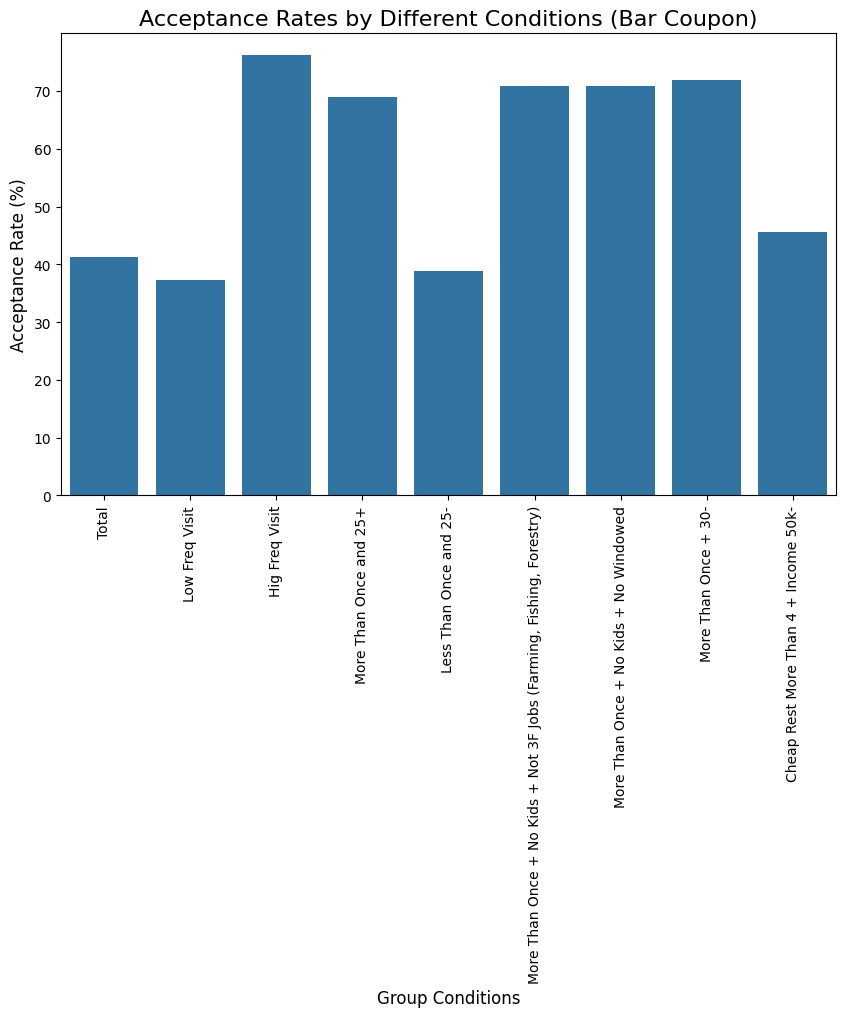

In [111]:
# Summary report graph per different groups of customers.

plt.figure(figsize=(10, 6))
dataReport_BarCoupon = {
    'Title': ['Total', 'Low Freq Visit', 'Hig Freq Visit', 'More Than Once and 25+', 'Less Than Once and 25-', 'More Than Once + No Kids + Not 3F Jobs (Farming, Fishing, Forestry)', 'More Than Once + No Kids + No Windowed', 'More Than Once + 30-', 'Cheap Rest More Than 4 + Income 50k-'],
    'AcceptRate': [barProportionOfAcceptCoupon * 100,
                   barAcceptRateForLowFrequentVisit * 100,
                   barAcceptRateForHighFrequentVisit * 100,
                   barAcceptRateForMoreThanOnceOver25 * 100,
                   barAcceptRateForLessThanOnceOtherAges * 100,
                   barAcceptRateForMoreThanOnce_NoKids_3FOccup * 100,
                   accptRate_moreThanOnce_noKid_noWindowed * 100,
                   acceptRate_moreThanOnce_under30 * 100,
                   acceptRate_cheapRestaurantMoreThan4Times_IncomeUnder50K * 100]
}

Report_BarCoupon = pd.DataFrame(dataReport_BarCoupon)
sns.barplot(x='Title', y='AcceptRate', data=Report_BarCoupon)
plt.xticks(rotation=90)
plt.title('Acceptance Rates by Different Conditions (Bar Coupon)', fontsize=16)
plt.xlabel('Group Conditions', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.savefig('accetance_rates_for_bar_coupon.png')

In [101]:
# Summary report of Bar coupon:

#As investigation on Bar type coupon, the overall accept rate  is 41%. After breakdown the Bar Coupon by different conditions, it is learned the follow groups of customer will have high chance to accept the coupon:
#1. Customers who visit bar more then 4 times (76%)
#2. Customers who visit bar more than once with over 25 years old (69%)
#3. Customers who visit bar more than once without kids passenger and are not working in Farming Fishing and Forestry (71%)
#4. Customers who visit bar more than once without Kids passenger and are not under windowed marital status (71%)
#5. Customers who visit bar more than once under 30 years old (72%)
#Also, the follow groups of customer will have less chance to accept the coupon:
#1. Customers who visit bar less than 4 times (37%)
#2. Customers who visit bar less than once with less than 25 years old (39%)
#3. Customers who visit cheap restaurant more than 4 times with income less than 50K (46%)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [102]:
# Analysis on "Coffee House Coupon"
coffeeHouseData = dataCleaned[dataCleaned['coupon'] == 'Coffee House']

# Total acceptance rate of Coffee House Coupon
coffeeHouseTotalAcceptRate = coffeeHouseData[coffeeHouseData['Y'] == 1].shape[0] / coffeeHouseData.shape[0]
coffeeHouseTotalAcceptRate


0.49633123689727465

In [103]:
# acceptance rate of those who went to a Coffee House 3 or fewer times a month:
coffeeHouseCountForLowFreqVisit = coffeeHouseData[coffeeHouseData['CoffeeHouse'].isin(['never', 'less1', '1~3'])]
coffeeHouseAcceptRateForLowFrequentVisit = coffeeHouseCountForLowFreqVisit[coffeeHouseCountForLowFreqVisit['Y'] == 1].shape[0] / coffeeHouseCountForLowFreqVisit.shape[0]
coffeeHouseAcceptRateForLowFrequentVisit

# acceptance rate of those who went to a Coffee Hourse more than 3 times a month:
coffeeHouseCountForHighFreqVisit = coffeeHouseData[coffeeHouseData['CoffeeHouse'].isin(['4~8', 'gt8'])]
coffeeHouseAcceptRateForHighFrequentVisit = coffeeHouseCountForHighFreqVisit[coffeeHouseCountForHighFreqVisit['Y'] == 1].shape[0] / coffeeHouseCountForHighFreqVisit.shape[0]
coffeeHouseAcceptRateForHighFrequentVisit

coffeeHouseAcceptRateForLowFrequentVisit, coffeeHouseAcceptRateForHighFrequentVisit

(0.44590495449949447, 0.6725559481743227)

In [105]:
# acceptance rate of those who went to a Coffee Hourse more than once a month and over 25 years old:
moreThanOnce = ['1~3', '4~8', 'gt8']
over25 = ['26', '31', '50plus', '36', '41', '46']
coffeeHouseCountForMoreThanOnceOver25 = coffeeHouseData.query('CoffeeHouse in @moreThanOnce & age in @over25')
coffeeHouseAcceptRateForMoreThanOnceOver25 = coffeeHouseCountForMoreThanOnceOver25[coffeeHouseCountForMoreThanOnceOver25['Y'] == 1].shape[0] / coffeeHouseCountForMoreThanOnceOver25.shape[0]
coffeeHouseAcceptRateForMoreThanOnceOver25

# acceptance rate of those who went to a Coffee Hourse less than once a month and other:
coffeeHouseCountForMoreThanOnceOtherAges = coffeeHouseData.query('CoffeeHouse in @moreThanOnce & age not in @over25')
coffeeHouseCAcceptRateForLessThanOnceOtherAges = coffeeHouseCountForMoreThanOnceOtherAges[coffeeHouseCountForMoreThanOnceOtherAges['Y'] == 1].shape[0] / coffeeHouseCountForMoreThanOnceOtherAges.shape[0]
coffeeHouseCAcceptRateForLessThanOnceOtherAges

coffeeHouseAcceptRateForMoreThanOnceOver25, coffeeHouseCAcceptRateForLessThanOnceOtherAges

(0.6395522388059701, 0.7083333333333334)

0.3485838779956427

In [126]:
# acceptance rate of those who go to Coffee House more than once a month and had passengers that were not a kid and had occupations of student or unemployed
moreThanOnce = ['1~3', '4~8', 'gt8']
passanger_kids = ['Kid(s)']
occupation_student_unemployed = ['Student', 'Unemployed']
coffeeHouseCountForMoreThanOnce_NoKids_student_unemployed = coffeeHouseData.query('CoffeeHouse in @moreThanOnce & passanger not in @passanger_kids & occupation in @occupation_student_unemployed')
coffeeHouseAcceptRateForMoreThanOnce_NoKids_student_unemployed = coffeeHouseCountForMoreThanOnce_NoKids_student_unemployed[coffeeHouseCountForMoreThanOnce_NoKids_student_unemployed['Y'] == 1].shape[0] / coffeeHouseCountForMoreThanOnce_NoKids_student_unemployed.shape[0]
coffeeHouseAcceptRateForMoreThanOnce_NoKids_student_unemployed


0.6958174904942965

In [124]:
moreThanOnce = ['1~3', '4~8', 'gt8']
passanger_kids = ['Kid(s)']
education_beyond_high_school = ['Graduate degree (Masters or Doctorate)', 'Bachelors degree', 'Some college - no degree', 'Associates degree']
age_under30 = ['21', '26', 'below21']
income_under50K = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
restaurantLessThan20_moreThan4Times = ['4~8', 'gt8']

# go to bars more than once a month, had education beyond high school
coffeeHouse_count_moreThanOnce_beyond_high_school = coffeeHouseData.query('CoffeeHouse in @moreThanOnce & education in @education_beyond_high_school')
coffeeHouse_accptRate_moreThanOnce_beyond_high_school = coffeeHouse_count_moreThanOnce_beyond_high_school[coffeeHouse_count_moreThanOnce_beyond_high_school['Y'] == 1].shape[0] / coffeeHouse_count_moreThanOnce_beyond_high_school.shape[0]

# go to bars more than once a month and are under the age of 30
coffeeHouse_count_moreThanOnce_under30 = coffeeHouseData.query('CoffeeHouse in @moreThanOnce & age in @age_under30')
coffeeHouse_acceptRate_moreThanOnce_under30 = coffeeHouse_count_moreThanOnce_under30[coffeeHouse_count_moreThanOnce_under30['Y'] == 1].shape[0] / coffeeHouse_count_moreThanOnce_under30.shape[0]

# go to cheap restaurants more than 4 times a month and income is less than 50K
coffeeHouse_count_cheapRestaurantMoreThan4Times_IncomeUnder50K = coffeeHouseData.query('RestaurantLessThan20 in @restaurantLessThan20_moreThan4Times & income in @income_under50K')
coffeeHouse_acceptRate_cheapRestaurantMoreThan4Times_IncomeUnder50K = coffeeHouse_count_cheapRestaurantMoreThan4Times_IncomeUnder50K[coffeeHouse_count_cheapRestaurantMoreThan4Times_IncomeUnder50K['Y'] == 1].shape[0] / coffeeHouse_count_cheapRestaurantMoreThan4Times_IncomeUnder50K.shape[0]

coffeeHouse_accptRate_moreThanOnce_beyond_high_school, coffeeHouse_acceptRate_moreThanOnce_under30, coffeeHouse_acceptRate_cheapRestaurantMoreThan4Times_IncomeUnder50K



(0.6536023054755044, 0.686046511627907, 0.5469845722300141)

Text(0, 0.5, 'Acceptance Rate (%)')

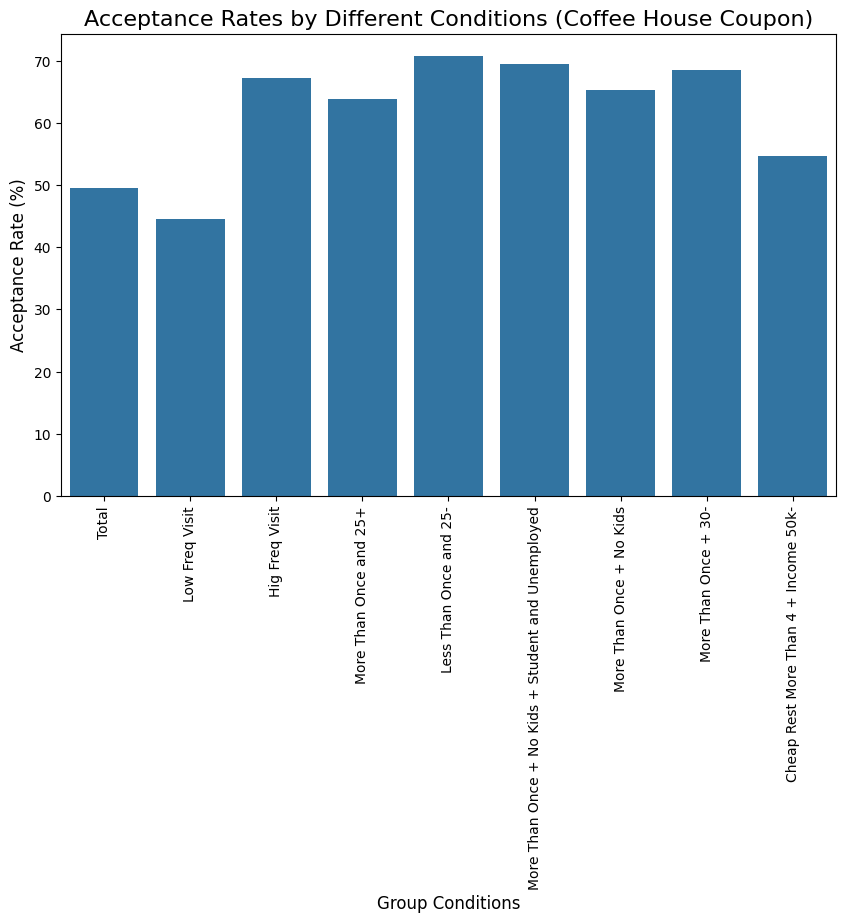

In [125]:
plt.figure(figsize=(10, 6))
dataReport_CoffeeHouseCoupon = {
    'Title': ['Total', 'Low Freq Visit', 'Hig Freq Visit', 'More Than Once and 25+', 'Less Than Once and 25-', 'More Than Once + No Kids + Student and Unemployed', 'More Than Once + No Kids', 'More Than Once + 30-', 'Cheap Rest More Than 4 + Income 50k-'],
    'AcceptRate': [
        coffeeHouseTotalAcceptRate*100,
        coffeeHouseAcceptRateForLowFrequentVisit * 100,
        coffeeHouseAcceptRateForHighFrequentVisit * 100,
        coffeeHouseAcceptRateForMoreThanOnceOver25 * 100,
        coffeeHouseCAcceptRateForLessThanOnceOtherAges * 100,
        coffeeHouseAcceptRateForMoreThanOnce_NoKids_student_unemployed * 100,
        coffeeHouse_accptRate_moreThanOnce_beyond_high_school * 100,
        coffeeHouse_acceptRate_moreThanOnce_under30 * 100,
        coffeeHouse_acceptRate_cheapRestaurantMoreThan4Times_IncomeUnder50K * 100]
}

Report_CoffeeHouseCoupon = pd.DataFrame(dataReport_CoffeeHouseCoupon)
sns.barplot(x='Title', y='AcceptRate', data=Report_CoffeeHouseCoupon)
plt.xticks(rotation=90)
plt.title('Acceptance Rates by Different Conditions (Coffee House Coupon)', fontsize=16)
plt.xlabel('Group Conditions', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.savefig('accetance_rates_for_coffee_house_coupon.png')


In [ ]:
# Summary report of Coffee House Coupon:

#As investigation on Coffee House type coupon, the overall accept rate  is 50%. After breakdown the Bar Coupon by different conditions, it is learned the follow groups of customer will have high chance to accept the coupon:
#1. Customers who visit bar more then 4 times (67%)
#2. Customers who visit bar more than once with both over 25 years old (64%) and less 25 years old (70%)
#3. Customers who visit bar more than once without kids passenger and are working as student or unemployed (70%)
#4. Customers who visit bar more than once with education beyond high school (65%)
#5. Customers who visit bar more than once under 30 years old (69%)
#Also, the follow groups of customer will have less chance to accept the coupon:
#1. Customers who visit bar less than 4 times (45%)
#2. Customers who visit cheap restaurant more than 4 times with income less than 50K (55%)